### 만약 훈련 데이터가 한 번에 준비되는 것이 아닌 조금씩 전달된다면?

데이터가 쌓일때까지 기다리기도 어렵게 도착하는대로 솔루션을 제시해야한다면? 

***
해결방안1. 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 훈련한다<Br>
단점: 시간이 지날수록 데이터가 늘어난다. 몇년이 지나면...  지속 가능한 방법은 아니다.
    

해결방안2. 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지한다.<br>
단점: 데이터를 버릴 때 다른 데이터에 없는 레이블이 들어가 있으면 문제가 생긴다.
    
***    
**앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 필요가 있다.... 이렇게 한다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 내용을 까먹을 일도 없다.**
    

이런 식의 훈련 방식을 **점진적 학습**이라고 부르며 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)**가 있다.
    


## 경사하강법

- 실제값과 예측값의 에러(loss)를 줄여나가는 가장 기본적인 optimizer 알고리즘
- 경사를 따라 내려가며 가중치(w)를 업데이트한다.
- 이때 학습률을 사용하여 최솟값을 찾아나가는데 학습률이 너무 크면 전역 최솟값을 놓칠 수 있고 너무 작으면 전역이 아닌 지역 최솟값에 머무를 수 있다.

## 배치 경사 하강법

- 여기서 말하는 배치(batch)는 전체 데이터셋 < 데이터(batch)를 분할 할 경우 mini-batch가 된다.
- 전체 데이터셋의 에러를 구한 뒤 모델의 파라미터를 업데이트 하는 방식
- 전체 데이터를 한번 업데이트하나 메모리를 많이 잡아먹으며 시간이 오래걸린다.

## 확률적 경사 하강법

- 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것

## 미니 배치 경사 하강법

- 전체 데이터셋에서 m개의 데이터를 뽑아 mini - batch를 구성하고 그것의 평균 기울기를 통해 모델을 업데이트한다.
- batch - size를 지정해줘야한다.

## 손실함수(loss function)

- 실제값과 예측값의 차이(loss)를 수치화하는 함수
- 오차가 클수록 손실 함수 값이 크고, 오차가 작을수록 손실 함수 값이 작다.

- 비용 함수(cost function)과는 다른 말이다. 손실 함수는 샘플 하나에 대한 손실을 정의하고 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말함! (하지만 통상적으로 이 둘을 구분하지 않고 섞어서 사용한다.)

### 로지스틱 손실함수

- 이진분류를 위한 손실함수, 다중 분류에서는 크로스엔트로피를 사용한다.
> 이진 분류는 2개의 정답만을 가지고 있으므로 타깃이 = 1(양성) 일 때 $-log(예측 확률)$, 타깃이 = 0(음성) 일 때 $-log(1-예측 확률)$<br>
> **따라서 확률이 0이나 1에서 멀어질수록 손실은 아주 큰 양수가 된다.**   ex)양성클래스가 예측 확률이 0.9,0.3일 경우 손실은 각각 0.11, 1.2가 된다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
data = pd.read_csv('./datasets/fish.csv', encoding = 'CP949')

In [3]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
target = data[['Species']].to_numpy()
data = data.drop(['Species'], axis = 1).to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target, random_state = 42)

In [6]:
y_train = y_train.flatten()
y_test =  y_test.flatten()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 6)
(40, 6)
(119,)
(40,)


In [7]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [8]:
# 손실함수 log, 훈련셋 10회 반복
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sgd.fit(train_scaled, y_train)
print(sgd.score(train_scaled, y_train))
print(sgd.score(test_scaled, y_test))

0.7983193277310925
0.875


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [9]:
# 조금 더 실행 횟수를 늘려보자 15회
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 15, random_state = 42)
sgd.fit(train_scaled, y_train)
print(sgd.score(train_scaled, y_train))
print(sgd.score(test_scaled, y_test))

0.865546218487395
0.875


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [10]:
# 너무 적은 반복으로 경고 발생, 100회 실시
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, random_state = 42)
sgd.fit(train_scaled, y_train)
print(sgd.score(train_scaled, y_train))
print(sgd.score(test_scaled, y_test))

0.9159663865546218
0.9


실행 횟수를 늘릴수록 정확도가 올라갔다. 


- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크**라고 부른다.

확률적 경사 하강법을 사용한 모델은 에포크에 따라 과소적합이나 과대적합이 될 수 있다. 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고, 에포크 횟수가 충분해야 훈련 세트를 완전히 적합이 가능할 것이다.

에포크에 따라 성능이 달라지므로 최적의 에포크를 얼마나 줘야하는지 판단할 필요가 있다.



In [11]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(y_train)

In [12]:
# 300번의 에포크 훈련 반복 진행
for _ in range(0,300) :
    sc.partial_fit(train_scaled, y_train, classes = classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

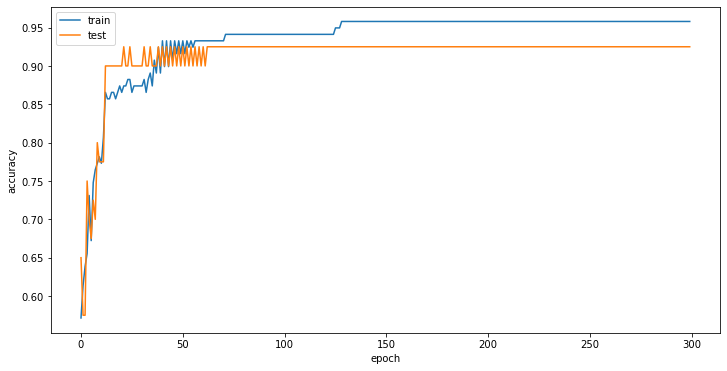

In [13]:
plt.figure(figsize = (12,6))
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

초기 에포크를 살펴보면 성능이 낮아 과소적합을 의심해봐야하고, 100번째 이후 부터 train과 test의 간격이 벌어지고 있음을 볼 수 있다.


반복 횟수를 100으로 지정하여 최종 모델 훈련

In [16]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, random_state = 42, tol = None)
sgd.fit(train_scaled, y_train)
print(sgd.score(train_scaled, y_train))
print(sgd.score(test_scaled, y_test))

0.9495798319327731
0.925


SGDclassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. 이때, tol = None으로 지정해주면 자동으로 멈추지 않고 무조건 지정한 횟수만큼 반복한다.

In [18]:
sgd = SGDClassifier(loss ='hinge', max_iter = 100, tol = None, random_state = 42)
sgd.fit(train_scaled, y_train)
print(sgd.score(train_scaled, y_train))
print(sgd.score(test_scaled, y_test))

0.8319327731092437
0.85


손실함수를 hinge로 지정해주면 서포트 벡터 머신의 손실 함수로 대체하여 적용이 가능하다.